In [324]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

In [325]:
# Import data
df = pd.read_csv('../Resources/Cleaning2/merged_events_bio.csv')
df.head(5)

,Athlete_ID,Name,Age,Sex,Height(cm),Weight(kg),Sport,Country_Name,Country_Code,Year,Season,isTeamSport,Medal,Result_ID
0,16809,Károly Teppert,21.0,M,NaN,NaN,Cycling Road,Hungary,HUN,1912,Summer,False,na,153233
1,16809,Károly Teppert,21.0,M,NaN,NaN,Cycling Road,Hungary,HUN,1912,Summer,True,na,153234
2,43737,Andrzej Socharski,29.0,M,173.0,72.0,Shooting,Poland,POL,1976,Summer,False,na,51745
3,50147,Nathalie Wunderlich,21.0,F,170.0,50.0,Swimming,Switzerland,SUI,1992,Summer,False,na,7860
4,50147,Nathalie Wunderlich,21.0,F,170.0,50.0,Swimming,Switzerland,SUI,1992,Summer,False,na,7870


In [326]:
df = df.rename(columns={'Sex': 'Gender'})
df.head(5)

,Athlete_ID,Name,Age,Gender,Height(cm),Weight(kg),Sport,Country_Name,Country_Code,Year,Season,isTeamSport,Medal,Result_ID
0,16809,Károly Teppert,21.0,M,NaN,NaN,Cycling Road,Hungary,HUN,1912,Summer,False,na,153233
1,16809,Károly Teppert,21.0,M,NaN,NaN,Cycling Road,Hungary,HUN,1912,Summer,True,na,153234
2,43737,Andrzej Socharski,29.0,M,173.0,72.0,Shooting,Poland,POL,1976,Summer,False,na,51745
3,50147,Nathalie Wunderlich,21.0,F,170.0,50.0,Swimming,Switzerland,SUI,1992,Summer,False,na,7860
4,50147,Nathalie Wunderlich,21.0,F,170.0,50.0,Swimming,Switzerland,SUI,1992,Summer,False,na,7870


In [327]:
# Define the medal colors
color_scale = {'Gold': 'gold', 'Silver': 'silver', 'Bronze': 'brown'}

In [328]:
# Define a function to filter the data by gender, year, sport and country
def filter_data(df, gender, sport=None, country=None):
    if gender == 'Both':
        filtered_df = df
    else:
        filtered_df = df[df['Gender'] == gender]
    
    if sport != "ALL":
        filtered_df = filtered_df[filtered_df['Sport'] == sport]
    
    if country != "ALL":
        filtered_df = filtered_df[filtered_df['Country_Name'] == country]  
      
    return filtered_df

In [329]:
# Define a function to update the scatter plot based on the dropdown menus
def update_scatter_plot(gender, sport, country):
    # Filter the data 
    filtered_df = filter_data(df, gender, sport, country)
    
    # Create the scatter plot
    fig = px.scatter(filtered_df, x='Weight(kg)', y='Height(cm)', color='Medal', symbol='Gender', color_discrete_map=color_scale,
                     symbol_map={'M': 'square', 'F': 'circle'}, title=f'Olympic Medalists Height & Weight')
    
    # Set the axis labels
    fig.update_layout(xaxis_title='Weight (kg)', yaxis_title='Height (cm)')
    
    # Show the plot
    fig.show()

In [341]:
# Define the dropdown menus
gender_dropdown = widgets.Dropdown(
    options=['Both', 'M', 'F'],
    value='Both',
    description='Gender:')

sports = ["ALL"] + df['Sport'].unique().tolist()
sports.sort()
sport_dropdown = widgets.Dropdown(options=sports, value="ALL", description="Sport:")

countries = ["ALL"] + df['Country_Name'].unique().tolist()
countries.sort()
country_dropdown = widgets.Dropdown(options=countries, value="ALL", description='Country:')

In [342]:
# Define the callback functions
def on_gender_change(change):
    update_scatter_plot(change.new, gender_dropdown.value)
    
def on_sport_change(change):
    update_scatter_plot(change.new, sport_dropdown.value)
    
def on_country_change(change):
    update_scatter_plot(change.new, country_dropdown.value)

In [343]:
# Register the callback functions
gender_dropdown.observe(on_gender_change, names='value')
sport_dropdown.observe(on_sport_change, names='value')
country_dropdown.observe(on_country_change, names='value')

In [349]:
# Display the dropdown menus
display(gender_dropdown)
display(sport_dropdown)
display(country_dropdown)

Dropdown(description='Gender:', index=1, options=('Both', 'M', 'F'), value='M')

Dropdown(description='Sport:', index=22, options=('3x3 Basketball', 'ALL', 'Aeronautics', 'Alpine Skiing', 'Al…

Dropdown(description='Country:', index=697, options=(' Afghanistan', ' Albania', ' Albania  Australia', ' Alba…

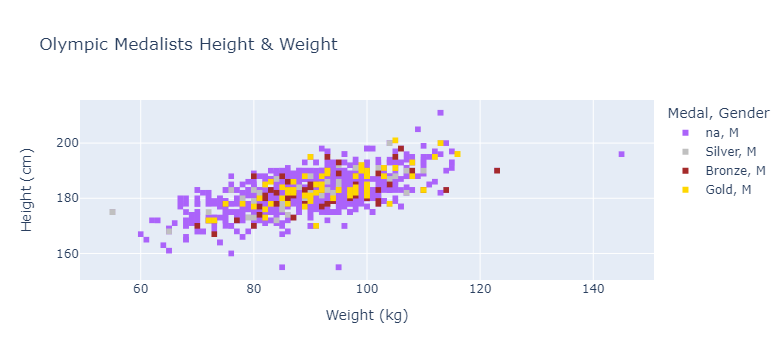

In [350]:
# Create the scatter plot
update_scatter_plot(gender_dropdown.value, sport_dropdown.value, country_dropdown.value)
